In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_data_weather.csv'
df = pd.read_csv(file_path)

In [3]:
df_original_data = df

In [4]:
df['next_1_day_mean_temp'] = df_original_data['mean_temp'].shift(-1)
df['next_2_day_mean_temp'] = df_original_data['mean_temp'].shift(-2)
df['next_3_day_mean_temp'] = df_original_data['mean_temp'].shift(-3)
df['next_4_day_mean_temp'] = df_original_data['mean_temp'].shift(-4)
df['next_5_day_mean_temp'] = df_original_data['mean_temp'].shift(-5)
df['next_6_day_mean_temp'] = df_original_data['mean_temp'].shift(-6)
df['next_7_day_mean_temp'] = df_original_data['mean_temp'].shift(-7)

In [5]:
df.dropna(inplace=True)

#### cloud_cover processing

In [6]:
df['cloud_cover'].value_counts()

7.0    3115
6.0    2951
5.0    2292
8.0    1902
4.0    1815
3.0    1148
2.0     859
1.0     603
0.0     375
5.8       2
6.8       2
5.4       2
7.4       2
9.0       2
5.6       1
6.2       1
6.6       1
7.2       1
Name: cloud_cover, dtype: int64

In [7]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [8]:
df['cloud_cover'].value_counts()

7.0    3115
6.0    2951
5.0    2292
8.0    1902
4.0    1815
3.0    1148
2.0     859
1.0     603
0.0     375
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [9]:
df['sunshine'] = df['sunshine'] * 60

<ipython-input-9-d19a2b1fcbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunshine'] = df['sunshine'] * 60


#### change snow depth into a category value

In [10]:
df['snow_depth'].value_counts()

0.0     14929
1.0        45
2.0        23
4.0        15
3.0        15
5.0         6
6.0         4
7.0         4
8.0         4
10.0        2
0.4         2
12.0        2
11.0        2
9.0         1
18.0        1
13.0        1
15.0        1
16.0        1
22.0        1
0.8         1
Name: snow_depth, dtype: int64

In [11]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [12]:
df['snow_depth'].value_counts()

0.0    14929
1.0      131
Name: snow_depth, dtype: int64

#### change the precipitation into category value

In [13]:
df['precipitation'].value_counts()

0.00     7905
0.20     1005
0.40      452
0.10      313
0.60      296
         ... 
53.10       1
18.70       1
25.40       1
20.00       1
0.46        1
Name: precipitation, Length: 261, dtype: int64

In [14]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

<ipython-input-14-c7ee6bde3366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)


In [15]:
df['precipitation'].value_counts()

0    7905
1    4249
2    2335
3     567
4       4
Name: precipitation, dtype: int64

#### one-hot encoding

In [16]:
df_encoded = pd.get_dummies(df['cloud_cover'], prefix='cloud_cover')

df = pd.concat([df, df_encoded], axis=1)

df.drop('cloud_cover', axis=1, inplace=True)

In [17]:
df_encoded = pd.get_dummies(df['precipitation'], prefix='precipitation')

df = pd.concat([df, df_encoded], axis=1)

df.drop('precipitation', axis=1, inplace=True)

In [18]:
df_encoded = pd.get_dummies(df['snow_depth'], prefix='snow_depth')

df = pd.concat([df, df_encoded], axis=1)

df.drop('snow_depth', axis=1, inplace=True)

#### delete the date

In [19]:
del df['date']

In [20]:
df.head()

,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,next_1_day_mean_temp,next_2_day_mean_temp,next_3_day_mean_temp,next_4_day_mean_temp,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,420.0,52.0,2.3,-4.1,-7.5,101900.0,-2.6,-2.8,-2.6,-0.8,...,0,0,0,0,1,0,0,0,0,1
1,102.0,27.0,1.6,-2.6,-7.5,102530.0,-2.8,-2.6,-0.8,-0.5,...,1,0,0,1,0,0,0,0,0,1
2,0.0,13.0,1.3,-2.8,-7.2,102050.0,-2.6,-0.8,-0.5,1.5,...,0,0,0,1,0,0,0,0,0,1
3,0.0,13.0,-0.3,-2.6,-6.5,100840.0,-0.8,-0.5,1.5,6.9,...,0,0,1,1,0,0,0,0,0,1
4,120.0,29.0,5.6,-0.8,-1.4,102250.0,-0.5,1.5,6.9,3.7,...,1,0,0,1,0,0,0,0,0,1


#### normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure']

scaler = MinMaxScaler()


df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

#### check if any INF or NAN

In [22]:
inf_check = np.isinf(df)
print(inf_check.any())

sunshine                False
global_radiation        False
max_temp                False
mean_temp               False
min_temp                False
pressure                False
next_1_day_mean_temp    False
next_2_day_mean_temp    False
next_3_day_mean_temp    False
next_4_day_mean_temp    False
next_5_day_mean_temp    False
next_6_day_mean_temp    False
next_7_day_mean_temp    False
cloud_cover_0.0         False
cloud_cover_1.0         False
cloud_cover_2.0         False
cloud_cover_3.0         False
cloud_cover_4.0         False
cloud_cover_5.0         False
cloud_cover_6.0         False
cloud_cover_7.0         False
cloud_cover_8.0         False
precipitation_0         False
precipitation_1         False
precipitation_2         False
precipitation_3         False
precipitation_4         False
snow_depth_0.0          False
snow_depth_1.0          False
dtype: bool


In [23]:
inf_check = np.isnan(df)
print(inf_check.any())

sunshine                False
global_radiation        False
max_temp                False
mean_temp               False
min_temp                False
pressure                False
next_1_day_mean_temp    False
next_2_day_mean_temp    False
next_3_day_mean_temp    False
next_4_day_mean_temp    False
next_5_day_mean_temp    False
next_6_day_mean_temp    False
next_7_day_mean_temp    False
cloud_cover_0.0         False
cloud_cover_1.0         False
cloud_cover_2.0         False
cloud_cover_3.0         False
cloud_cover_4.0         False
cloud_cover_5.0         False
cloud_cover_6.0         False
cloud_cover_7.0         False
cloud_cover_8.0         False
precipitation_0         False
precipitation_1         False
precipitation_2         False
precipitation_3         False
precipitation_4         False
snow_depth_0.0          False
snow_depth_1.0          False
dtype: bool


In [24]:
df.columns

Index(['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp',
       'pressure', 'next_1_day_mean_temp', 'next_2_day_mean_temp',
       'next_3_day_mean_temp', 'next_4_day_mean_temp', 'next_5_day_mean_temp',
       'next_6_day_mean_temp', 'next_7_day_mean_temp', 'cloud_cover_0.0',
       'cloud_cover_1.0', 'cloud_cover_2.0', 'cloud_cover_3.0',
       'cloud_cover_4.0', 'cloud_cover_5.0', 'cloud_cover_6.0',
       'cloud_cover_7.0', 'cloud_cover_8.0', 'precipitation_0',
       'precipitation_1', 'precipitation_2', 'precipitation_3',
       'precipitation_4', 'snow_depth_0.0', 'snow_depth_1.0'],
      dtype='object')

In [25]:
df = df.astype('float32')

In [26]:
df.dtypes

sunshine                float32
global_radiation        float32
max_temp                float32
mean_temp               float32
min_temp                float32
pressure                float32
next_1_day_mean_temp    float32
next_2_day_mean_temp    float32
next_3_day_mean_temp    float32
next_4_day_mean_temp    float32
next_5_day_mean_temp    float32
next_6_day_mean_temp    float32
next_7_day_mean_temp    float32
cloud_cover_0.0         float32
cloud_cover_1.0         float32
cloud_cover_2.0         float32
cloud_cover_3.0         float32
cloud_cover_4.0         float32
cloud_cover_5.0         float32
cloud_cover_6.0         float32
cloud_cover_7.0         float32
cloud_cover_8.0         float32
precipitation_0         float32
precipitation_1         float32
precipitation_2         float32
precipitation_3         float32
precipitation_4         float32
snow_depth_0.0          float32
snow_depth_1.0          float32
dtype: object

In [27]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [28]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

new_order = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp',
       'pressure', 'cloud_cover_0.0', 'cloud_cover_1.0',
       'cloud_cover_2.0', 'cloud_cover_3.0', 'cloud_cover_4.0',
       'cloud_cover_5.0', 'cloud_cover_6.0', 'cloud_cover_7.0',
       'cloud_cover_8.0', 'precipitation_0', 'precipitation_1',
       'precipitation_2', 'precipitation_3', 'precipitation_4',
       'snow_depth_0.0', 'snow_depth_1.0', 'next_1_day_mean_temp',
       'next_2_day_mean_temp', 'next_3_day_mean_temp', 'next_4_day_mean_temp',
       'next_5_day_mean_temp', 'next_6_day_mean_temp', 'next_7_day_mean_temp']
df = df[new_order]
data = df.values

In [29]:
df.columns

Index(['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp',
       'pressure', 'cloud_cover_0.0', 'cloud_cover_1.0', 'cloud_cover_2.0',
       'cloud_cover_3.0', 'cloud_cover_4.0', 'cloud_cover_5.0',
       'cloud_cover_6.0', 'cloud_cover_7.0', 'cloud_cover_8.0',
       'precipitation_0', 'precipitation_1', 'precipitation_2',
       'precipitation_3', 'precipitation_4', 'snow_depth_0.0',
       'snow_depth_1.0', 'next_1_day_mean_temp', 'next_2_day_mean_temp',
       'next_3_day_mean_temp', 'next_4_day_mean_temp', 'next_5_day_mean_temp',
       'next_6_day_mean_temp', 'next_7_day_mean_temp'],
      dtype='object')

In [30]:
data.shape

(15060, 29)

In [31]:
def split_dataset_into_seq(dataset, start_index=0, end_index=None, history_size=50, step=1):
    '''split the dataset to have sequence of observations of length history size'''
    data = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)

In [32]:
def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.5, save_path=None):
    '''split the dataset into train, val and test splits'''
    # normalization
    data_mean = data[:, :22].mean(axis=0)
    data_std = data[:, :22].std(axis=0)
    standardized_data = (data[:, :22] - data_mean) / data_std
    data = np.concatenate((standardized_data, data[:, 22:]), axis=1)

    data_in_seq = split_dataset_into_seq(data, start_index=0, end_index=None, history_size=50, step=1)

    # split between validation dataset and test set:
    train_data, val_data = train_test_split(data_in_seq, train_size=TRAIN_SPLIT, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, train_size=VAL_SPLIT, shuffle=True, random_state=123)

    return train_data, val_data, test_data

In [33]:
def data_to_dataset(train_data, val_data, test_data, batch_size=32, target_features=list(range(22, 29))):
    '''
    split each train split into inputs and targets
    convert each train split into a tf.dataset
    '''
    x_train = torch.tensor(train_data[:, :, :target_features[0]], device=device)
    print('shape of x_train: ', x_train.shape)
    y_train = torch.tensor(train_data[:, -1, target_features], device=device)
    print('shape of y_train: ', y_train.shape)
    x_val = torch.tensor(val_data[:, :, :target_features[0]], device=device)
    print('shape of x_val: ', x_val.shape)
    y_val = torch.tensor(val_data[:, -1, target_features], device=device)
    print('shape of y_val: ', y_val.shape)
    x_test = torch.tensor(test_data[:, :, :target_features[0]], device=device)
    print('shape of x_test: ', x_test.shape)
    y_test = torch.tensor(test_data[:, -1, target_features], device=device)
    print('shape of y_test: ', y_test.shape)
    #x_train, y_train = split_fn(train_data)
    #x_val, y_val = split_fn(val_data)
    #x_test, y_test = split_fn(test_data)

    #x_train = x_train[:, :, :target_features[0]]
    #y_val = y_val[:, :, :target_features[0]]
    #y_test = y_test[:, :, :target_features[0]]
    # selecting only the last 3 features for prediction:
    #y_train = y_train[:, :, target_features]
    #y_val = y_val[:, :, target_features]
    #y_test = y_test[:, :, target_features]
    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader

In [34]:
train_data, val_data, test_data = split_dataset(data)
train_dataset, val_dataset, test_dataset = data_to_dataset(train_data, val_data, test_data)

shape of x_train:  torch.Size([10507, 50, 22])
shape of y_train:  torch.Size([10507, 7])
shape of x_val:  torch.Size([2251, 50, 22])
shape of y_val:  torch.Size([2251, 7])
shape of x_test:  torch.Size([2252, 50, 22])
shape of y_test:  torch.Size([2252, 7])


In [35]:
for batch_data, batch_labels in train_dataset:
    # batch_data是一个包含数据批次的Tensor
    # batch_labels是一个包含相应标签的Tensor

    # 打印第一个批次数据的形状
    print("Batch Data Shape:", batch_data.shape)
    print("Batch Labels Shape:", batch_labels.shape)

    # 退出循环，只查看第一个批次
    break

Batch Data Shape: torch.Size([32, 50, 22])
Batch Labels Shape: torch.Size([32, 7])


#### Implement the Transformer model

In [36]:
import torch.nn as nn
import math

class MultiHeadAttention(nn.Module):
    '''Multi-head self-attention module'''
    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        self.H = H # number of heads
        self.D = D # dimension

        # Linear transformations for queries, keys, and values
        self.wq = nn.Linear(D, D*H)
        self.wk = nn.Linear(D, D*H)
        self.wv = nn.Linear(D, D*H)

        # Linear transformation for output
        self.dense = nn.Linear(D*H, D)

    def concat_heads(self, x):
        '''(B, H, S, D) => (B, S, D*H)'''
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H*D))   # (B, S, D*H)
        return x

    def split_heads(self, x):
        '''(B, S, D*H) => (B, H, S, D)'''
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)    # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):

        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2)) #(B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        # add the mask to the scaled tensor.
        if mask is not None:
            attention_scores += (mask * -1e9)

        attention_weights = nn.Softmax(dim=-1)(attention_scores)
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention) # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights

In [37]:
# Positional encodings
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates


def positional_encoding(D, position=60, dim=3, device=device):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(D)[np.newaxis, :], D)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis,np.newaxis,  ...]
    return torch.tensor(pos_encoding, device=device)

In [38]:
# function that implement the look_ahead mask for masking future time steps.
def create_look_ahead_mask(size, device=device):
    mask = torch.ones((size, size), device=device)
    mask = torch.triu(mask, diagonal=1)
    return mask  # (size, size)

In [39]:
create_look_ahead_mask(6)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [40]:
class TransformerLayer(nn.Module):
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        super(TransformerLayer, self).__init__()
        self.dropout_rate = dropout_rate
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)


    def forward(self, x, look_ahead_mask):

        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        attn = self.dropout1(attn) # (B,S,D)
        attn = self.layernorm1(attn + x) # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        mlp_act = self.mlp_out(mlp_act)
        mlp_act = self.dropout2(mlp_act)

        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights

In [41]:
class TransformerEncoder(nn.Module):
    '''Transformer Encoder Implementing several Encoder Layers.
    '''
    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, dropout_rate):
        super(TransformerEncoder, self).__init__()
        self.num_layers = num_layers
        self.input_projection = nn.Linear(inp_features, D)  # multivariate input
        self.pos_encoding = positional_encoding(D)
        self.enc_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, dropout_rate=dropout_rate) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        B, S, D = x.shape
        x = self.input_projection(x)
        x += self.pos_encoding[:, :S, :]
        x = self.dropout(x)

        for i in range(self.num_layers):
            x, _ = self.enc_layers[i](x=x, look_ahead_mask=mask)

        return x

In [42]:
class Transformer(nn.Module):
    '''Transformer Encoder-Decoder Architecture.
    '''
    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate):
        super(Transformer, self).__init__()
        self.encoder = TransformerEncoder(num_layers, D, H, hidden_mlp_dim, inp_features, dropout_rate)
        self.decoder = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, dropout_rate=dropout_rate) for _ in range(num_layers)])
        self.sqrt_D = torch.tensor(math.sqrt(D))
        self.output_projection = nn.Linear(D, out_features)  # multivariate output

    def forward(self, x, mask):
        enc_output = self.encoder(x, mask)
        B, S, D = enc_output.shape
        dec_attention_weights = {}

        for i, layer in enumerate(self.decoder):
            enc_output, block = layer(x=enc_output, look_ahead_mask=mask)
            dec_attention_weights['decoder_layer{}'.format(i + 1)] = block

        dec_output = self.output_projection(enc_output)

        return dec_output[:, -1, :], dec_attention_weights  # (B,S,S)

#### early stop

In [43]:
# 定义早停函数
def early_stopping(val_loss, patience=10, delta=0):
  if len(val_loss) < patience + 1:
    return False

  best_loss = min(val_loss[:-patience])
  last_loss = val_loss[-1]

  if last_loss > best_loss - delta:
    return True

  return False

#### fitness function

In [74]:
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR

def Transformer_fitness_function(params):

    # Defince the parameters
    num_layers = [4, 6, 8][int(params[0])]
    D = [64, 128, 256][int(params[1])]
    H = [6, 8, 10, 12][int(params[2])]
    hidden_mlp_dim = int(params[3]) # 通常在 D 的一定倍数内选择，例如在 D 的 2 到 4 倍之间
    dropout_rate = params[4]
    learning_rate = params[5]
    n_epochs = [50, 100, 200][int(params[6])]
    niter = len(train_dataset)

    transformer = Transformer(num_layers=num_layers, D=D, H=H, hidden_mlp_dim=hidden_mlp_dim*D, inp_features=22, out_features=7, dropout_rate=dropout_rate).to(device)
    optimizer = torch.optim.Adam(transformer.parameters(), lr=learning_rate)

    # train!!!
    losses, val_losses = [], []
    best_model_state = None

    # 学习率衰减
    step_size = 5
    gamma = 0.9
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    for e in tqdm(range(n_epochs)):
        # one epoch on train set
        transformer.train()
        sum_train_loss = 0.0
        for x, y in train_dataset:
            optimizer.zero_grad()
            S = x.shape[1]
            mask = create_look_ahead_mask(S)
            out, _ = transformer(x, mask)
            loss = torch.nn.MSELoss()(out, y)

            loss.backward()
            optimizer.step()

            sum_train_loss += loss.item()

        scheduler.step()
        losses.append(sum_train_loss / niter)

        # Evaluate on val set
        transformer.eval()
        sum_val_loss = 0.0
        total_val_samples = 0
        for i, (x, y) in enumerate(val_dataset):
            S = x.shape[1]
            mask = create_look_ahead_mask(S)
            out, _ = transformer(x, mask)
            loss = torch.nn.MSELoss()(out, y)
            sum_val_loss += loss.item()
        val_losses.append(sum_val_loss / (i + 1))

        # 检查是否早停
        if early_stopping(val_losses, patience=30, delta=0.0001):
            print("\n Early stopping triggered!")
            best_model_state = transformer.state_dict()
            break

    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)
    transformer.eval()

    with torch.no_grad():
        total_mse = 0.0
        for i, (x, y) in enumerate(val_dataset):
            S = x.shape[1]
            mask = create_look_ahead_mask(S)
            out, _ = transformer(x, mask)
            loss = torch.nn.MSELoss()(out, y)
            total_mse += loss.item()

        # Calculate the average loss for the entire validation set
        #print(total_mse)
        mse_loss = total_mse / (i + 1)

        # Print the average loss for this validation set
        #print(f"Validation Loss: {validation_loss:.4f}")

    return mse_loss

In [75]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=eff9a5957f8e422b730878a4b523473f1b43f230527f815b8d73d2e6e1f61acd
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


 48%|████▊     | 95/200 [12:58<14:20,  8.20s/it]


 Early stopping triggered!



 62%|██████▏   | 31/50 [10:32<06:27, 20.40s/it]


 Early stopping triggered!


||||||||||________________________________________ 20.0% GA is running...

 31%|███       | 62/200 [08:53<19:46,  8.60s/it]


 Early stopping triggered!



 25%|██▌       | 50/200 [08:00<24:00,  9.60s/it]


 Early stopping triggered!



 26%|██▌       | 52/200 [08:19<23:42,  9.61s/it]


 Early stopping triggered!



 86%|████████▌ | 43/50 [13:25<02:11, 18.73s/it]


 Early stopping triggered!


||||||||||||||||||||______________________________ 40.0% GA is running...

 16%|█▌        | 31/200 [05:04<27:40,  9.83s/it]


 Early stopping triggered!



 73%|███████▎  | 73/100 [11:40<04:19,  9.60s/it]


 Early stopping triggered!



 39%|███▉      | 78/200 [12:17<19:14,  9.46s/it]


 Early stopping triggered!


||||||||||||||||||||||||||||||____________________ 60.0% GA is running...

 42%|████▎     | 85/200 [13:20<18:02,  9.41s/it]


 Early stopping triggered!



 26%|██▋       | 53/200 [08:23<23:15,  9.49s/it]


 Early stopping triggered!


||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

 31%|███       | 62/200 [09:46<21:44,  9.45s/it]


 Early stopping triggered!



 24%|██▍       | 49/200 [07:44<23:52,  9.49s/it]


 Early stopping triggered!



 25%|██▌       | 50/200 [07:55<23:47,  9.52s/it]


 Early stopping triggered!


|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

 24%|██▍       | 48/200 [14:48<46:52, 18.51s/it]


 Early stopping triggered!



 18%|█▊        | 36/200 [05:44<26:08,  9.57s/it]


 Early stopping triggered!



 16%|█▌        | 31/200 [05:00<27:17,  9.69s/it]


 Early stopping triggered!


 The best solution found:
 [0.00000000e+00 2.00000000e+00 1.00000000e+00 3.00000000e+00
 2.67268794e-02 1.08645463e-04 2.00000000e+00]

 Objective function:
 2.0904814760449906


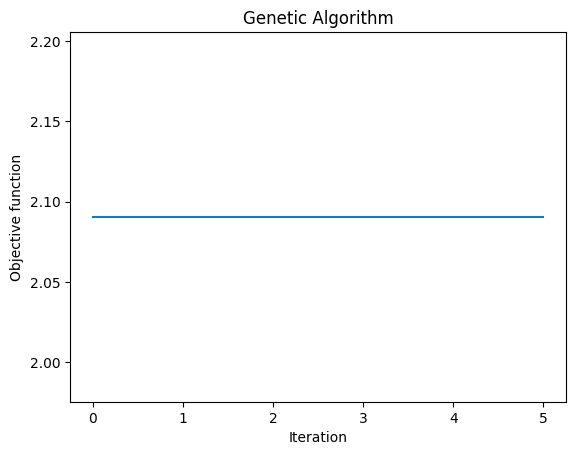

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


varbound = np.array([          [0, 2],              # num_layers
                     [0, 2],               # D
                     [0, 3],               # H
                     [2, 4],               # hidden_mlp_dim
                     [0, 0.2],              # dropout_rate
                     [0.00005, 0.0002],          # learning_rate
                     [0, 2]                # n_epochs
                     ])



# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 5, 'population_size': 5, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=Transformer_fitness_function, dimension=7, variable_type='real',
           variable_type_mixed  = np.array(['int', 'int', 'int', 'int', 'real', 'real', 'int']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 100000)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']




In [44]:
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

num_layers = [4, 6, 8][int(0.00000000e+00)]
D = [64, 128, 256][int(2.00000000e+00)]
H = [6, 8, 10, 12][int(1.00000000e+00)]
hidden_mlp_dim = int(3.00000000e+00) # 通常在 D 的一定倍数内选择，例如在 D 的 2 到 4 倍之间
dropout_rate = 2.67268794e-02
learning_rate = 1.08645463e-04
n_epochs = [50, 100, 200][int(2.00000000e+00)]
niter = len(train_dataset)

transformer = Transformer(num_layers=num_layers, D=D, H=H, hidden_mlp_dim=hidden_mlp_dim*D, inp_features=22, out_features=7, dropout_rate=dropout_rate).to(device)
optimizer = torch.optim.Adam(transformer.parameters(), lr=learning_rate)

# train!!!
losses, val_losses = [], []
best_model_state = None

# 学习率衰减
step_size = 5
gamma = 0.9
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

for e in tqdm(range(n_epochs)):
    # one epoch on train set
    transformer.train()
    sum_train_loss = 0.0
    for x, y in train_dataset:
        optimizer.zero_grad()
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)

        loss.backward()
        optimizer.step()

        sum_train_loss += loss.item()

    scheduler.step()
    losses.append(sum_train_loss / niter)

    # Evaluate on val set
    transformer.eval()
    sum_val_loss = 0.0
    total_val_samples = 0
    for i, (x, y) in enumerate(val_dataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_val_loss += loss.item()
    val_losses.append(sum_val_loss / (i + 1))

    # 检查是否早停
    if early_stopping(val_losses, patience=30, delta=0.0001):
        print("\n Early stopping triggered!")
        best_model_state = transformer.state_dict()
        break

    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)


100%|██████████| 200/200 [30:32<00:00,  9.16s/it]


In [45]:
def median_absolute_error(y_true, y_pred):
    absolute_errors = torch.abs(y_true - y_pred)
    return torch.median(absolute_errors).item()

In [46]:
def pearson_correlation(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    numerator = torch.sum((y_true - y_true_mean) * (y_pred - y_pred_mean))
    denominator = torch.sqrt(torch.sum((y_true - y_true_mean) ** 2)) * torch.sqrt(torch.sum((y_pred - y_pred_mean) ** 2))
    pearson_corr = numerator / denominator
    return pearson_corr.item()

In [47]:
def index_of_agreement(y_true, y_pred):
    numerator = torch.sum((y_true - y_pred) ** 2)
    denominator = torch.sum((torch.abs(y_pred - torch.mean(y_true)) + torch.abs(y_true - torch.mean(y_true))) ** 2)
    index_agreement = 1 - (numerator / denominator)
    return index_agreement.item()

In [48]:
transformer.eval()

with torch.no_grad():
    total_mse = 0.0
    total_mae = 0.0
    total_md_ae = 0.0
    total_mape = 0.0
    total_rmspe = 0.0
    total_pearson_corr = 0.0
    total_index_agreement = 0.0

    for i, (x, y) in enumerate(test_dataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)

        # Compute the loss (MSE)
        loss = torch.nn.MSELoss()(out, y)
        total_mse += loss.item()

        # Compute the loss (MAE)
        mae = torch.mean(torch.abs(out - y))
        total_mae += mae.item()

        # Compute the loss (MdAE)
        md_ae = median_absolute_error(out, y)
        total_md_ae += md_ae

        # Compute the loss (MAPE)
        absolute_percentage_errors = torch.abs((y - out) / y)
        absolute_percentage_errors = absolute_percentage_errors[~torch.isinf(absolute_percentage_errors) & ~torch.isnan(absolute_percentage_errors)]
        mape = torch.mean(absolute_percentage_errors).item() * 100
        total_mape += mape

        # Compute the loss (RMSPE)
        squared_percentage_errors = ((y - out) / y) ** 2
        squared_percentage_errors = squared_percentage_errors[~torch.isinf(squared_percentage_errors)]
        rmspe = torch.sqrt(torch.mean(squared_percentage_errors)).item() * 100
        total_rmspe += rmspe

        # Compute the Pearson Correlation Coefficient
        pearson_corr = pearson_correlation(y, out)
        total_pearson_corr += pearson_corr

        # Compute the Index of Agreement
        index_agreement = index_of_agreement(y, out)
        total_index_agreement += index_agreement


    mse_loss = total_mse / (len(test_dataset))
    rmse_loss = np.sqrt(mse_loss)
    mae_loss = total_mae / len(test_dataset)
    md_ae_loss = total_md_ae / len(test_dataset)
    mape_loss = total_mape / len(test_dataset)
    rmspe_loss = total_rmspe / len(test_dataset)
    pearson_corr_avg = total_pearson_corr / len(test_dataset)
    index_agreement_avg = total_index_agreement / len(test_dataset)



print(f'MSE: {mse_loss:.4f}')
print(f'RMSE: {rmse_loss:.4f}')
print(f'MAE: {mae_loss:.4f}')
print(f'MdAE: {md_ae_loss:.4f}')
print(f'MAPE: {mape_loss:.4f}')
print(f'RMSPE: {rmspe_loss:.4f}')
print(f'Pearson Coefficient: {pearson_corr_avg:.4f}')
print(f'Index of Agreement (IoA): {index_agreement_avg:.4f}')


MSE: 2.3268
RMSE: 1.5254
MAE: 1.1582
MdAE: 0.9138
MAPE: 18.4817
RMSPE: 53.8122
Pearson Coefficient: 0.9607
Index of Agreement (IoA): 0.9798
